## Quick plotting using pandas

In [1]:
import pandas as pd

In [2]:
# Read in our data
surveys_df = pd.read_csv('../data/raw/surveys.csv')

In [8]:
# Checking your current working directory
import os
os.getcwd()

'/Users/svenvanderburg/projects/teaching/dc-python-april/notebooks'

In [11]:
# Get the count for each species
species_counts = surveys_df.groupby('species_id')['record_id'].count()

In [12]:
species_counts

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

<AxesSubplot:xlabel='species_id'>

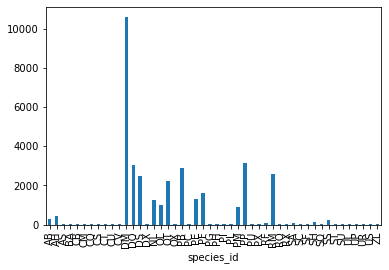

In [14]:
species_counts.plot(kind='bar')

In [17]:
# Count the number animals captured at each site
site_count = surveys_df.groupby('plot_id')['record_id'].count()

<AxesSubplot:xlabel='plot_id'>

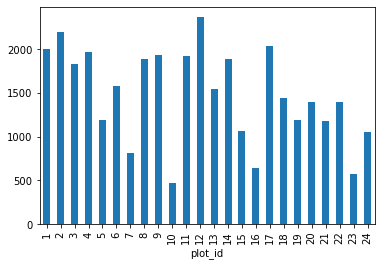

In [18]:
site_count.plot(kind='bar')

##### 1. Average weight plot
Create a bar plot of average weight across all species per site.

<AxesSubplot:xlabel='plot_id'>

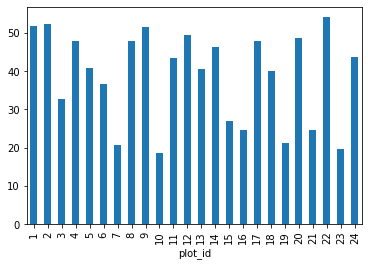

In [20]:
average_weight = surveys_df.groupby('plot_id')['weight'].mean()
average_weight.plot(kind='bar')

##### 2. Sex plot
Create a bar plot of total males versus total females for the entire dataset.

<AxesSubplot:xlabel='sex'>

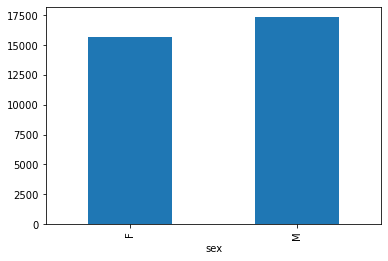

In [22]:
sex_totals = surveys_df.groupby('sex')['record_id'].count()
sex_totals.plot(kind='bar')

##### 3. Summary challenge
Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each site.

In [31]:
total_weights_by_sex_and_site = surveys_df.groupby(['plot_id', 'sex'])['weight'].sum()
total_weights_by_sex_and_site.head(4)

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
Name: weight, dtype: float64

In [37]:
total_weights_by_sex_and_site.unstack(level=0) # alternative way of unstacking (that we won't use)

plot_id,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
sex,,,,,,,,,,,,,,,,,,,,,
F,38253.0,50144.0,27251.0,39796.0,21143.0,26210.0,6522.0,37274.0,44128.0,2359.0,...,12455.0,5446.0,42106.0,27353.0,11297.0,33206.0,15481.0,34656.0,3352.0,22951.0
M,59979.0,57250.0,28253.0,49377.0,23326.0,27245.0,6422.0,47755.0,48727.0,2776.0,...,11037.0,6310.0,48082.0,26433.0,11514.0,25988.0,9815.0,35363.0,3883.0,18835.0


In [38]:
unstacked = total_weights_by_sex_and_site.unstack()
unstacked.head(4)

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0


Text(0.5, 0, 'Plot')

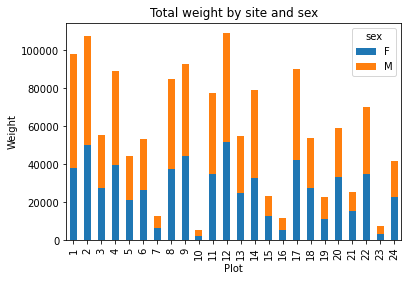

In [34]:
plt = unstacked.plot(kind='bar', stacked=True, title="Total weight by site and sex")
plt.set_ylabel("Weight")
plt.set_xlabel("Plot")

<AxesSubplot:xlabel='plot_id,sex'>

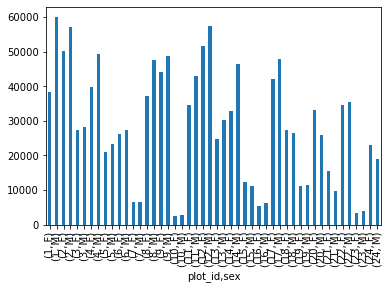

In [39]:
total_weights_by_sex_and_site.plot(kind='bar', stacked=True)